#  Gerador de animações

Este notebook importa do ficheiro `resultados.txt` a sequência de configurações geradas durante a simulação e gera a animação correspondente. 

### 1. Inicialização 

A célula seguinte deve ser avaliada no início de cada sessão.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ast
import datetime

%matplotlib nbagg

### 2. Leitura do ficheiro de dados

Os dados ficheiro ``resultados.txt`` são importados para as variáveis ``Dim``, ``lista`` e ``obstaculos``. A célula seguinte deve ser avaliada sempre que o ficheiro resultados.txt for alterado.

In [2]:
f=open('resultados.txt','r')
lista=[]
for line in f:
    lista.append(ast.literal_eval(line))
    
f.close()
Dim=lista[0]
obstaculos=lista[1]
nobst=len(obstaculos)
lista=lista[2:]
max_point=max([len(w[0])+len(w[1])+len(w[2])+len(w[3]) for w in lista])+nobst+1
len(lista)

5850

### 3. Animação (dentro deste notebook)

A célula seguinte deve ser avaliada para gerar a animação.

<IPython.core.display.Javascript object>


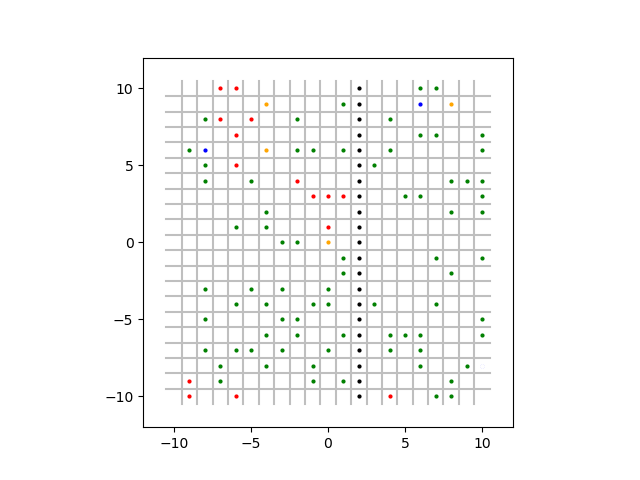

In [3]:
fig=plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-Dim-2,Dim+2), ylim=(-Dim-2,Dim+2))

#desenha as grelhas (desfasadas das coordenadas certas para os pontos ficarem centrados) - check limites
for i in range(-Dim,Dim):
    lines, = ax.plot([-Dim-0.5,Dim+0.5],[i+0.5,i+0.5],'-',color='0.75')
for i in range(-Dim,Dim):
    lines, = ax.plot([i+0.5,i+0.5],[-Dim-0.5,Dim+0.5],'-',color='0.75')
    

# valor inicial dos pontos
ponto=[[] for i in range(max_point)]
for i in range(max_point):
    ponto[i], = ax.plot([],[], marker='o',markersize=2)

for j in range(nobst):
    ponto[j].set_data(obstaculos[j][0],obstaculos[j][1])
    ponto[j].set_color("black")
    
def animate(i):
    frame=lista[i]
    k=nobst
    for j in range(k,k+len(frame[0])):
        ponto[j].set_data(frame[0][j-k][0],frame[0][j-k][1])
        ponto[j].set_color("green")
    k=k+len(frame[0])
    for j in range(k,k+len(frame[1])):
        ponto[j].set_data(frame[1][j-k][0],frame[1][j-k][1])
        ponto[j].set_color("orange")
    k=k+len(frame[1])
    for j in range(k,k+len(frame[2])):
        ponto[j].set_data(frame[2][j-k][0],frame[2][j-k][1])
        ponto[j].set_color("red")
    k=k+len(frame[2])
    for j in range(k,k+len(frame[3])):
        ponto[j].set_data(frame[3][j-k][0],frame[3][j-k][1])
        ponto[j].set_color("blue")
    k=k+len(frame[3])
    for j in range(k,max_point):
        ponto[j].set_color("white")
    return ponto

ani = animation.FuncAnimation(fig, animate, frames=len(lista), interval=1, repeat=True, blit=True)
plt.show()

### 4. Animação (para um ficheiro mp4)

A célula seguinte deve ser avaliada para gerar um ficheiro de animação. Note que para usar esta célula é necessário ter previamente instalado no computador a biblioteca open-cv. Esta biblioteca pode ser instalada com o comando ``conda install -c anaconda opencv`` no terminal do computador.

In [4]:
from PIL import Image, ImageDraw
import cv2
import argparse
import os

def from_grid_to_jpg(g,filename,export_flag = True):
    white  = (255, 255, 255)
    black  = (0, 0, 0)
    blue   = (0, 0, 255)
    red    = (255, 0, 0)
    green  = (0,128,0)
    orange = (255,165,0)
    
    width,height = 2*g[0]+1,2*g[0]+1
    image = Image.new("RGB", (width, height), white)
    draw  = ImageDraw.Draw(image) 
    
    for (x,y) in g[1][0]:
        draw.line((x+g[0]+1,y+g[0]+1,x+g[0]+1,y+g[0]+1), green)
    for (x,y) in g[1][1]:
        draw.line((x+g[0]+1,y+g[0]+1,x+g[0]+1,y+g[0]+1), orange)
    for (x,y) in g[1][2]:
        draw.line((x+g[0]+1,y+g[0]+1,x+g[0]+1,y+g[0]+1), red)
    for (x,y) in g[1][3]:
        draw.line((x+g[0]+1,y+g[0]+1,x+g[0]+1,y+g[0]+1), blue)
    for (x,y) in g[2]:
        draw.line((x+g[0]+1,y+g[0]+1,x+g[0]+1,y+g[0]+1), black)
    if export_flag:
        image.save(filename)



def simVideo(Dim,lista,obstaculos,jumps,Video_flag = True):
    frame_nr = len(lista)
    try:
        os.stat('./tempDir')
    except:
        os.mkdir('./tempDir') 
    dir_path = './tempDir/'
    ext      = 'jpg' 
    date     = datetime.datetime.now().strftime("%I:%M:%S%p_%B-%d-%Y");
    output   = 'output'+date+'.mp4' 

    
    [from_grid_to_jpg([Dim,lista[i],obstaculos],dir_path+str(i)+".jpg") for i in range(0,frame_nr,jumps)]    

    

    images = []
    for i in range(0,frame_nr,jumps):
        images.append(str(i)+".jpg")
   
    # Determine the width and height from the first image
    image_path = os.path.join(dir_path, images[0])

    
    frame = cv2.imread(image_path)
    cv2.imshow('video',frame)
    height, width, channels = frame.shape

    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
    out = cv2.VideoWriter(output, fourcc, float(10), (width, height))


    for image in images:

        image_path = os.path.join(dir_path, image)
        frame = cv2.imread(image_path)

        out.write(frame) # Write out frame to video

        cv2.imshow('video',frame)
        if (cv2.waitKey(1) & 0xFF) == ord('q'): # Hit `q` to exit
            break


    # Release everything if job is finished
    out.release()
    cv2.destroyAllWindows()
    for image in images:
        os.remove(os.path.join(dir_path,image))
    os.rmdir(dir_path)


#O quarto parametro da função (50) de quantas em quantas linhas de resultados.txt é gerada uma imagem
# Pode ser aumentado no caso de ficheiros resultado.txt muito grandes.

simVideo(Dim,lista,obstaculos,50) 